# Introduction to Regression with Neural Networks in TensorFlow

There are many definitions for a regression problem but in our case, we're going to simplify it: predicting a numerical variable based on some other combination of variables, even shorter... predicting a number.

In [ ]:
# Import tensorflow
import tensorflow as tf
print(tf.__version__)

2.11.0


# Creating data to view and fit

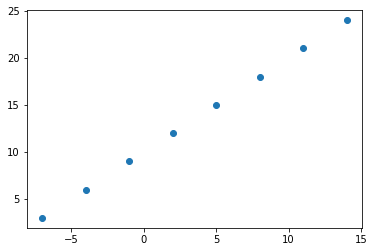

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Create features
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

# Create labels
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

# Visualize it
plt.scatter(X, y);

## Input and output shapes

In [ ]:
# Create a demo tensor for our housing price prediction problem
house_info = tf.constant(["bedroom", "bathroom", "garage"])
house_price = tf.constant([939700])
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [ ]:
input_shape = X.shape
output_shape = y.shape

input_shape, output_shape

((8,), (8,))

In [ ]:
# Turn our numpyt arrays into tensors
X = tf.cast(tf.constant(X), dtype=tf.float32)
y = tf.cast(tf.constant(y), dtype=tf.float32)

X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

## Steps in modelling with TensorFlow

1. **Creating a model** - define the input and output layers, as well as the hidden layers of a deep learning model.
2. **Compiling a model** - define the loss function (in other words, the function which tells our model how wrong it is) and the optimizer (tells our model how to improve the patterns its learning) and evaluation metrics (what we can use to interpret the performance of our model)
3. **Fitting a model** - letting the model try to find patterns between X & y (features and labels).

In [ ]:
# Set random seed
tf.random.set_seed(42)

# 1. Create a model usiong the Sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(), # sgd is short for stochastic gradient descent
              metrics=["mae"])

# 3. Fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=50)

Epoch 1/50
1/1 [==============================] - 1s 1s/step - loss: 11.0296 - mae: 11.0296
Epoch 2/50
1/1 [==============================] - 0s 15ms/step - loss: 10.8971 - mae: 10.8971
Epoch 3/50
1/1 [==============================] - 0s 13ms/step - loss: 10.7646 - mae: 10.7646
Epoch 4/50
1/1 [==============================] - 0s 13ms/step - loss: 10.6321 - mae: 10.6321
Epoch 5/50
1/1 [==============================] - 0s 17ms/step - loss: 10.4995 - mae: 10.4995
Epoch 6/50
1/1 [==============================] - 0s 17ms/step - loss: 10.3671 - mae: 10.3671
Epoch 7/50
1/1 [==============================] - 0s 13ms/step - loss: 10.2346 - mae: 10.2346
Epoch 8/50
1/1 [==============================] - 0s 13ms/step - loss: 10.1021 - mae: 10.1021
Epoch 9/50
1/1 [==============================] - 0s 12ms/step - loss: 9.9696 - mae: 9.9696
Epoch 10/50
1/1 [==============================] - 0s 10ms/step - loss: 9.8370 - mae: 9.8370
Epoch 11/50
1/1 [==============================] - 0s 11ms/step -

In [ ]:
# Check out X and y
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [ ]:
# Try and make a prediction using our model
model.predict([37.0])

1/1 [==============================] - 0s 50ms/step


array([[64.11866]], dtype=float32)

## Improving our model

We can improve our model, by altering the steps we took to create a model.

1. **Creating a model** - here we might add more layers, increase the number of hidden units (all caled neurons), within each of the hidden layers, change the activation function of each layers.
2. **Compiling a model** - here we might change the optimization function or perhaps the **learning rate** of the optimization function.
3. **Fitting a model** - here we might fit a model for more **epochs** (leave it training for longer) or on more data (give the model more examples to learn from).

In [ ]:
# Let's rebuild our model

# 1. Create the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(50, activation=None),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              metrics=["mae"])

# 3. Fit the model (this time we'll train for longer)
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
1/1 [==============================] - 2s 2s/step - loss: 10.6319 - mae: 10.6319
Epoch 2/100
1/1 [==============================] - 0s 18ms/step - loss: 9.8870 - mae: 9.8870
Epoch 3/100
1/1 [==============================] - 0s 12ms/step - loss: 9.1285 - mae: 9.1285
Epoch 4/100
1/1 [==============================] - 0s 17ms/step - loss: 8.3531 - mae: 8.3531
Epoch 5/100
1/1 [==============================] - 0s 13ms/step - loss: 7.5590 - mae: 7.5590
Epoch 6/100
1/1 [==============================] - 0s 13ms/step - loss: 7.0991 - mae: 7.0991
Epoch 7/100
1/1 [==============================] - 0s 14ms/step - loss: 7.2968 - mae: 7.2968
Epoch 8/100
1/1 [==============================] - 0s 15ms/step - loss: 7.5372 - mae: 7.5372
Epoch 9/100
1/1 [==============================] - 0s 12ms/step - loss: 7.6334 - mae: 7.6334
Epoch 10/100
1/1 [==============================] - 0s 15ms/step - loss: 7.6175 - mae: 7.6175
Epoch 11/100
1/1 [==============================] - 0s 13ms/step - lo

In [ ]:
# Remind ourselves of the data
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [ ]:
# Let's see if our model's prediction has improved
model.predict([17.0])

1/1 [==============================] - 0s 86ms/step


array([[28.38361]], dtype=float32)

2/2 [==============================] - 0s 5ms/step


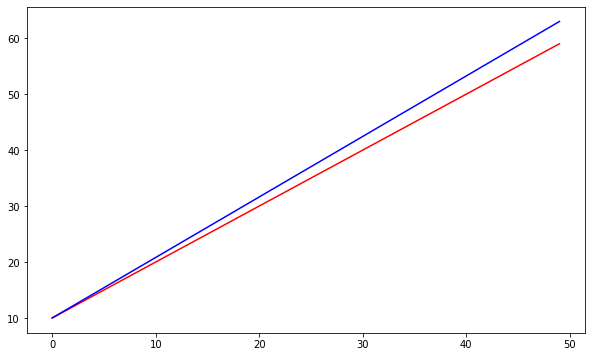

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))

x = np.arange(0, 50, 1)
ax.plot(x, x + 10, c="r")
ax.plot(x, model.predict(x), c="b");

# Evaluating a model

In practice, a typical workflow you'll go through when building neural networks is:

```
Build a model -> fit it -> evaluate it -> tweak a model -> fit it -> evaluate it -> tweak a model -> fit it -> evaluate it...
```

When it comes to evaluation... There are 3 words you should memorize:

> "Visualize, visualize, visualize"

It's a good idea to visualize::
* the data = what data are we working with? What does it look like?
* The model itself - what does our model look like?
* The training of a model - how does a model perform while it learns?
* The predictions of the model - how do the predictions of a model line up against the ground truth (the original labels)?

In [59]:
# Make a bigger dataset
X = tf.range(-100, 100, 4)
X


<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [60]:
# Make labels for the dataset
y = X + 10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

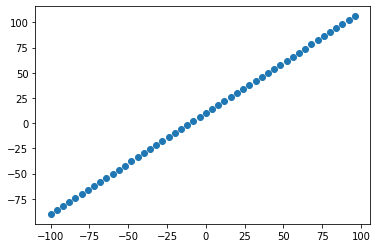

In [62]:
# Visualize the data
plt.scatter(X, y)

### The 3 sets...